<a href="https://colab.research.google.com/github/shatinz/tripreports/blob/master/tripreport2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dependencies

In [ ]:
!pip install sentence-transformers transformers accelerate
!pip install generativeai
!pip install pandas
!pip install google-generativeai

# extracting tables and reports


In [11]:
#1.extracting links
import requests
from bs4 import BeautifulSoup

url = "https://www.erowid.org/experiences/exp.cgi?S1=18&ShowViews=0&Cellar=0&Start=100&Max=100"
response = requests.get(url, verify=False)  # Disable SSL verification
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tr elements with class "exp-list-row"
rows = soup.find_all('tr', class_='exp-list-row')

# Extract href from the <a> tag within each row
links = []
for row in rows:
    link_tag = row.find('a')
    if link_tag and 'href' in link_tag.attrs:
        links.append("https://www.erowid.org/experiences/" + link_tag['href'])

# Print the extracted links
for link in links:
    print(link)

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


https://www.erowid.org/experiences/exp.php?ID=94031
https://www.erowid.org/experiences/exp.php?ID=94073
https://www.erowid.org/experiences/exp.php?ID=94770
https://www.erowid.org/experiences/exp.php?ID=89351
https://www.erowid.org/experiences/exp.php?ID=93223
https://www.erowid.org/experiences/exp.php?ID=88824
https://www.erowid.org/experiences/exp.php?ID=91352
https://www.erowid.org/experiences/exp.php?ID=94174
https://www.erowid.org/experiences/exp.php?ID=86537
https://www.erowid.org/experiences/exp.php?ID=92625
https://www.erowid.org/experiences/exp.php?ID=93030
https://www.erowid.org/experiences/exp.php?ID=90577
https://www.erowid.org/experiences/exp.php?ID=95155
https://www.erowid.org/experiences/exp.php?ID=94274
https://www.erowid.org/experiences/exp.php?ID=95087
https://www.erowid.org/experiences/exp.php?ID=93105
https://www.erowid.org/experiences/exp.php?ID=92355
https://www.erowid.org/experiences/exp.php?ID=92678
https://www.erowid.org/experiences/exp.php?ID=87176
https://www.

In [12]:
#extracting html of tables
import requests
from bs4 import BeautifulSoup
from IPython.display import display

# Assuming 'links' list from the previous cell is available

extracted_data = []

for link in links:
    try:
        response = requests.get(link, verify=False)
        soup = BeautifulSoup(response.content, 'html.parser')

        substance_div = soup.find('div', class_='substance')
        substance = substance_div.text.strip() if substance_div else None

        dosechart_table = soup.find('table', class_='dosechart')
        dosechart = str(dosechart_table) if dosechart_table else None

        bodyweight_table = soup.find('table', class_='bodyweight')
        bodyweight = str(bodyweight_table) if bodyweight_table else None

        footdata_table = soup.find('table', class_='footdata')
        footdata = str(footdata_table) if footdata_table else None

        extracted_data.append({
            'link': link,
            'substance': substance,
            'dosechart': dosechart,
            'bodyweight': bodyweight,
            'footdata': footdata
        })

    except Exception as e:
        print(f"Error processing link {link}: {e}")

# You can now process the extracted_data list, for example, print it
display(extracted_data)

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097

KeyboardInterrupt: 

In [ ]:
#mapping scrapted tables html to schema
import pandas as pd
from bs4 import BeautifulSoup

schema_fields = [
    "previous_experience",
    "set_and_setting",
    "dose_amount", # Renamed dose_and_route to dose_amount
    "dose_method", # Added new field for dose method
    "before_after_changes",
    "extraordinary_thinking",
    "combination_with_other_substances",
    "intention",
    "experience_phases",
    "onset_description",
    "perceived_realness",
    "objective_elements",
    "entities_or_other_beings",
    "childhood_trauma",
    "time_relation",
    "sex_effects",
    "self_love_experience",
    "semantic_relations",
    "year_of_experience",
    "age",
    "gender",
    "substance_used",
    "most_important_element"
]

processed_reports = []

for report_data in extracted_data:
    processed_report = {}
    for field in schema_fields:
        processed_report[field] = None  # Initialize all fields to None

    # Map scraped data to schema_fields
    if report_data.get('substance'):
        processed_report['substance_used'] = report_data['substance']

    if report_data.get('bodyweight'):
        bodyweight_soup = BeautifulSoup(report_data['bodyweight'], 'html.parser')
        bodyweight_td = bodyweight_soup.find('td', class_='bodyweight-amount')
        processed_report['age'] = bodyweight_td.text.strip() if bodyweight_td else None

    if report_data.get('footdata'):
        footdata_soup = BeautifulSoup(report_data['footdata'], 'html.parser')

        year_td = footdata_soup.find('td', class_='footdata-expyear')
        processed_report['year_of_experience'] = year_td.text.replace('Exp Year:', '').strip() if year_td else None

        gender_td = footdata_soup.find('td', class_='footdata-gender')
        processed_report['gender'] = gender_td.text.replace('Gender:', '').strip() if gender_td else None

        age_td = footdata_soup.find('td', class_='footdata-ageofexp')
        processed_report['age'] = age_td.text.replace('Age at time of experience:', '').strip() if age_td else None

    # Extract dose amount and method from dosechart
    if report_data.get('dosechart'):
        dosechart_soup = BeautifulSoup(report_data['dosechart'], 'html.parser')
        amount_td = dosechart_soup.find('td', class_='dosechart-amount')
        method_td = dosechart_soup.find('td', class_='dosechart-method')

        processed_report['dose_amount'] = amount_td.text.strip() if amount_td else None
        processed_report['dose_method'] = method_td.text.strip() if method_td else None

    processed_reports.append(processed_report)

# Create a pandas DataFrame from the processed data
df_processed_reports = pd.DataFrame(processed_reports)

# Display the first few rows of the DataFrame
display(df_processed_reports.head())

In [ ]:
#extracting reports html
import requests
from bs4 import BeautifulSoup
import json

# Assuming 'links' list is available from the previous scraping step

report_html_contents = []

for link in links:
    try:
        response = requests.get(link, verify=False) # Disable SSL verification
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        report_html_contents.append({
            'link': link,
            'html_content': response.text # Store text content instead of bytes
        })
        print(f"Fetched content for: {link}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching content for {link}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while fetching {link}: {e}")

print(f"Finished fetching content for {len(report_html_contents)} reports.")

# Save the scraped data to a JSON file
with open('reports_html.json', 'w') as f:
    json.dump(report_html_contents, f, indent=4)

print("Scraped HTML data saved to reports_html.json")

In [ ]:
#cleaning reports html
from bs4 import BeautifulSoup, Comment # Import Comment to find HTML comments
import json

cleaned_reports = []

for report_data in report_html_contents:
    link = report_data['link']
    html_content = report_data['html_content']

    try:
        soup = BeautifulSoup(html_content, 'html.parser')

        # Find the div containing the report text
        report_div = soup.find('div', class_='report-text-surround')
        report_text = None

        if report_div:
            # The main report text is often between <!-- Start Body --> and <!-- End Body --> comments
            # within the 'report-text-surround' div. We need to iterate through the contents
            # to find the text nodes and handle <br> tags.
            content_started = False
            extracted_lines = []
            for content in report_div.contents:
                if isinstance(content, Comment) and "Start Body" in content:
                    content_started = True
                    continue
                if isinstance(content, Comment) and "End Body" in content:
                    content_started = False
                    break
                if content_started:
                    if content.name == 'br':
                        extracted_lines.append('\n') # Replace <br> with newline
                    elif isinstance(content, str):
                        extracted_lines.append(content)
                    # You might need to handle other tags within the text if they exist,
                    # but for simple text and line breaks, this should work.
                    # If there are nested tags with text, you might need a recursive approach
                    # or use get_text() on specific elements if they consistently contain text.
                    elif hasattr(content, 'get_text'):
                         extracted_lines.append(content.get_text())


            report_text = "".join(extracted_lines).strip()

        if report_text:
            cleaned_reports.append({
                'link': link,
                'report_text': report_text
            })
            print(f"Successfully extracted report text for {link}")
        else:
            print(f"Warning: Could not extract report text for {link}")

    except Exception as e:
        print(f"Error processing HTML for {link}: {e}")

print(f"Finished extracting report text for {len(cleaned_reports)} reports.")

# Save the cleaned reports to a JSON file
with open('cleaned_reports.json', 'w') as f:
    json.dump(cleaned_reports, f, indent=4)

print("Cleaned report data saved to cleaned_reports.json")

# sending extracted report to llm


In [ ]:
schema_fields = [
    "previous_experience",
    "set_and_setting",
    "before_after_changes",
    "intention",
    "experience_phases",
    "onset_description",
    "perceived_realness",
    "objective_elements",
    "entities_or_other_beings",
    "childhood_trauma",
    "sex_effects",
    "self_love_experience",
    "most_important_element"
]


# Task
Extract information from each report in "cleaned_reports.json" using the Gemini API to fill a predefined schema. Chunk reports if necessary to fit within token limits, process each chunk separately, and save the extracted information for each report and chunk. Implement sleep time between API calls.

## Load cleaned reports

### Subtask:
Load the cleaned report data from `cleaned_reports.json`.


**Reasoning**:
Load the cleaned report data from the JSON file.



In [ ]:
import json

with open('cleaned_reports.json', 'r') as f:
    cleaned_reports = json.load(f)

## Initialize gemini api

### Subtask:
Set up the Gemini API key and model.


**Reasoning**:
Configure the Gemini API key and specify the model for text generation.



In [ ]:
import google.generativeai as genai
import os
from google.colab import userdata

# Configure the Gemini API key
# Ensure you have the API key stored in an environment variable or replace 'YOUR_API_KEY'
genai.configure(api_key=userdata.get("GOOGLE_API_KEY"))

# Specify the Gemini model to be used
model_name = "gemini-1.5-flash"

## Define schema and prompt

### Subtask:
Define the schema fields and create a clear prompt for Gemini to extract information from the reports based on the schema, emphasizing concise answers.


**Reasoning**:
Define the schema fields and create the extraction prompt for the Gemini model based on the instructions.



In [ ]:
schema_fields = [
    "previous_experience",
    "set_and_setting",
    "before_after_changes",
    "intention",
    "experience_phases",
    "onset_description",
    "perceived_realness",
    "objective_elements",
    "entities_or_other_beings",
    "childhood_trauma",
    "sex_effects",
    "self_love_experience",
    "most_important_element",
    "experiencing_fear"
]

extraction_prompt = f"""
You are an AI assistant tasked with extracting specific information from a drug experience report.
Your goal is to read the provided report text and extract information for the following fields:
{', '.join(schema_fields)}

For each field, provide a concise answer directly related to the field name.
If the information for a field is not present in the report, state "Not specified".

Here is the report text:
{{report_text}}

Please provide the extracted information in a structured format (e.g., JSON or a clear list of key-value pairs).
"""

print(extraction_prompt)


You are an AI assistant tasked with extracting specific information from a drug experience report.
Your goal is to read the provided report text and extract information for the following fields:
previous_experience, set_and_setting, before_after_changes, intention, experience_phases, onset_description, perceived_realness, objective_elements, entities_or_other_beings, childhood_trauma, sex_effects, self_love_experience, most_important_element, experiencing_fear

For each field, provide a concise answer directly related to the field name.
If the information for a field is not present in the report, state "Not specified".

Here is the report text:
{report_text}

Please provide the extracted information in a structured format (e.g., JSON or a clear list of key-value pairs).



## Process reports with gemini

### Subtask:
Iterate through each cleaned report. For each report:
- Check if the report text needs chunking to fit within Gemini's token limit.
- If chunking is needed, split the report into smaller chunks.
- Send each chunk (or the whole report if no chunking is needed) to the Gemini API with the defined prompt.
- Process Gemini's response to extract the schema information.
- Store the extracted information for each report, keeping track of which chunk it came from if chunking was used.
- Implement a sleep time between API calls to avoid rate limits or token errors.


**Reasoning**:
Iterate through each cleaned report, chunk if necessary, send to Gemini API, process response, store extracted data, and implement sleep.



In [ ]:
import time

extracted_data_from_llm = []
# A rough estimate of token limit for Gemini 1.5 Flash, considering prompt size and response size
# This might need adjustment based on actual usage and model capabilities
TOKEN_LIMIT = 10000  # Example token limit, adjust as needed
SLEEP_TIME = 5  # seconds

for report_data in cleaned_reports:
    link = report_data['link']
    report_text = report_data['report_text']
    report_chunks = []

    # Simple chunking mechanism based on character count as a proxy for tokens
    # A more sophisticated approach would use a proper tokenizer
    if len(report_text) > TOKEN_LIMIT * 0.8: # Chunk if text is close to the limit
        # Split into chunks roughly based on token limit
        chunk_size = int(TOKEN_LIMIT * 0.7) # Make chunks smaller than the limit
        report_chunks = [report_text[i:i + chunk_size] for i in range(0, len(report_text), chunk_size)]
        print(f"Report {link} chunked into {len(report_chunks)} parts.")
    else:
        report_chunks = [report_text]
        print(f"Report {link} does not require chunking.")

    for i, chunk in enumerate(report_chunks):
        print(f"Processing chunk {i+1}/{len(report_chunks)} for report {link}")
        prompt = extraction_prompt.format(report_text=chunk)

        try:
            # Send prompt to Gemini API
            model = genai.GenerativeModel(model_name)
            response = model.generate_content(prompt)

            # Process the response
            # Assuming the response is in a format that can be directly used or easily parsed
            # This part might need significant adjustment based on Gemini's actual output format
            extracted_info = {
                'link': link,
                'chunk_index': i,
                'extracted_data': response.text # Store the raw response text for now
            }
            extracted_data_from_llm.append(extracted_info)
            print(f"Successfully processed chunk {i+1} for {link}")

        except Exception as e:
            print(f"Error processing chunk {i+1} for {link}: {e}")
            extracted_data_from_llm.append({
                'link': link,
                'chunk_index': i,
                'extracted_data': f"Error: {e}"
            })

        # Implement sleep time
        time.sleep(SLEEP_TIME)
        print(f"Sleeping for {SLEEP_TIME} seconds.")

# The extracted_data_from_llm list now contains the results for all reports and chunks
# You can further process or save this list as needed
# For this subtask, we just populate the list.

Report https://www.erowid.org/experiences/exp.php?ID=118252 chunked into 4 parts.
Processing chunk 1/4 for report https://www.erowid.org/experiences/exp.php?ID=118252
Error processing chunk 1 for https://www.erowid.org/experiences/exp.php?ID=118252: HTTPConnectionPool(host='localhost', port=38591): Read timed out. (read timeout=600.0)
Sleeping for 5 seconds.
Processing chunk 2/4 for report https://www.erowid.org/experiences/exp.php?ID=118252


KeyboardInterrupt: 

# embedding tripreports

In [1]:
import json
from sentence_transformers import SentenceTransformer

# Load cleaned reports
with open('cleaned_reports.json', 'r') as f:
    cleaned_reports = json.load(f)

# Initialize the Gemma embedding model
# You might need to adjust the model name based on available models in sentence-transformers
embedding_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate embeddings for each report
report_embeddings = []
for report in cleaned_reports:
    report_text = report['report_text']
    embedding = embedding_model.encode(report_text)
    report_embeddings.append({
        'link': report['link'],
        'embedding': embedding.tolist() # Convert numpy array to list for JSON serialization
    })

# You can now use report_embeddings for further analysis, e.g., similarity search, clustering
# For example, save the embeddings to a JSON file
with open('report_embeddings.json', 'w') as f:
    json.dump(report_embeddings, f, indent=4)

print(f"Generated embeddings for {len(report_embeddings)} reports and saved to report_embeddings.json")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated embeddings for 100 reports and saved to report_embeddings.json


*italicized text*# New Section


# adding df processedd reports

In [8]:
# Embedding df_processed_reports and adding to report_embeddings

# Assuming 'embedding_model' is already initialized from a previous step
# Assuming 'df_processed_reports' is available from a previous step
# Assuming 'cleaned_reports' is available from a previous step and has the links

# Create a combined text representation for each row in the DataFrame
df_processed_reports['combined_text'] = df_processed_reports.apply(
    lambda row: ' '.join(f"{col}: {row[col]}" for col in df_processed_reports.columns if col not in ['link', 'combined_text'] and pd.notna(row[col])),
    axis=1
)

# Generate embeddings for the combined text and associate with the original link
df_embeddings = []
# Iterate through the processed reports and use the link from the original cleaned_reports
for index, row in df_processed_reports.iterrows():
    combined_text = row['combined_text']
    embedding = embedding_model.encode(combined_text)
    # Find the corresponding link from the cleaned_reports using the index
    original_link = cleaned_reports[index]['link']
    df_embeddings.append({
        'link': original_link,
        'embedding': embedding.tolist() # Convert numpy array to list for JSON serialization
    })

# Append the new embeddings to the existing report_embeddings list
# Load existing embeddings first if the list is not already in memory
try:
    with open('report_embeddings.json', 'r') as f:
        report_embeddings = json.load(f)
except FileNotFoundError:
    report_embeddings = [] # Start with an empty list if the file doesn't exist

report_embeddings.extend(df_embeddings)

# Save the updated embeddings to a JSON file
with open('report_embeddings.json', 'w') as f:
    json.dump(report_embeddings, f, indent=4)

print(f"Generated embeddings for {len(df_embeddings)} processed reports and added to report_embeddings.json.")
print(f"Total embeddings in report_embeddings.json: {len(report_embeddings)}")

Generated embeddings for 100 processed reports and added to report_embeddings.json.
Total embeddings in report_embeddings.json: 200




```

```

# extracting other pages

#clustering




In [14]:
import json
import numpy as np
import hdbscan
import pandas as pd

# Load embeddings from the JSON file
with open('report_embeddings.json', 'r') as f:
    report_embeddings_data = json.load(f)

# Extract embeddings and links
links = [item['link'] for item in report_embeddings_data]
embeddings = np.array([item['embedding'] for item in report_embeddings_data])

# Apply HDBSCAN clustering
# You might need to adjust the parameters (e.g., min_cluster_size, min_samples)
# based on your data and desired clustering granularity.
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(embeddings)

# Get cluster labels
# -1 typically indicates noise points (points not assigned to any cluster)
cluster_labels = clusterer.labels_

# Add cluster labels back to the data structure
# You can add it to the original list or create a new structure
for i, label in enumerate(cluster_labels):
    report_embeddings_data[i]['hdbscan_cluster_label'] = int(label) # Store as int

# Optionally, save the updated data with cluster labels to a new JSON file
with open('report_embeddings_with_hdbscan_clusters.json', 'w') as f:
    json.dump(report_embeddings_data, f, indent=4)

print(f"Applied HDBSCAN clustering. Found {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)} clusters.")
print(f"Cluster labels added to data and saved to 'report_embeddings_with_hdbscan_clusters.json'.")

# You can also add the cluster labels to the df_processed_reports DataFrame
# Ensure the order of embeddings matches the order of rows in the DataFrame
# This might require aligning by link if the order is not guaranteed
if 'df_processed_reports' in locals():
    # Create a mapping from link to cluster label
    link_to_cluster = {item['link']: item['hdbscan_cluster_label'] for item in report_embeddings_data}
    # Add cluster labels to the DataFrame based on the 'link' column
    # Make sure the 'link' column exists in df_processed_reports and matches the links in report_embeddings_data
    if 'link' in df_processed_reports.columns:
        df_processed_reports['hdbscan_cluster_label'] = df_processed_reports['link'].map(link_to_cluster)
        print("HDBSCAN cluster labels added to df_processed_reports DataFrame.")
    else:
        print("Warning: 'link' column not found in df_processed_reports. Could not add cluster labels to DataFrame.")

# --- Add code for analyzing clusters ---

# Convert the data with cluster labels to a pandas DataFrame for easier analysis
df_clustered_reports = pd.DataFrame(report_embeddings_data)

# Display the number of reports in each cluster
print("\nNumber of reports per cluster:")
print(df_clustered_reports['hdbscan_cluster_label'].value_counts())

# Function to display example reports from a specific cluster
def display_example_reports(cluster_label, num_examples=3):
    print(f"\nExample reports from Cluster {cluster_label}:")
    cluster_reports = df_clustered_reports[df_clustered_reports['hdbscan_cluster_label'] == cluster_label]
    if cluster_reports.empty:
        print("No reports found in this cluster.")
        return

    # Display the links of example reports
    for i, row in cluster_reports.head(num_examples).iterrows():
        print(f"- {row['link']}")

# Example usage: Display example reports from the first few clusters (excluding noise)
unique_clusters = sorted(df_clustered_reports['hdbscan_cluster_label'].unique())
for cluster_label in unique_clusters:
    if cluster_label != -1: # Exclude noise cluster
        display_example_reports(cluster_label)

Applied HDBSCAN clustering. Found 4 clusters.
Cluster labels added to data and saved to 'report_embeddings_with_hdbscan_clusters.json'.

Number of reports per cluster:
hdbscan_cluster_label
 0    76
-1    54
 2    48
 3    14
 1     8
Name: count, dtype: int64

Example reports from Cluster 0:
- https://www.erowid.org/experiences/exp.php?ID=118252
- https://www.erowid.org/experiences/exp.php?ID=112397
- https://www.erowid.org/experiences/exp.php?ID=96444

Example reports from Cluster 1:
- https://www.erowid.org/experiences/exp.php?ID=64048
- https://www.erowid.org/experiences/exp.php?ID=103790
- https://www.erowid.org/experiences/exp.php?ID=58800

Example reports from Cluster 2:
- https://www.erowid.org/experiences/exp.php?ID=112397
- https://www.erowid.org/experiences/exp.php?ID=62835
- https://www.erowid.org/experiences/exp.php?ID=99695

Example reports from Cluster 3:
- https://www.erowid.org/experiences/exp.php?ID=113133
- https://www.erowid.org/experiences/exp.php?ID=96614
- https:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


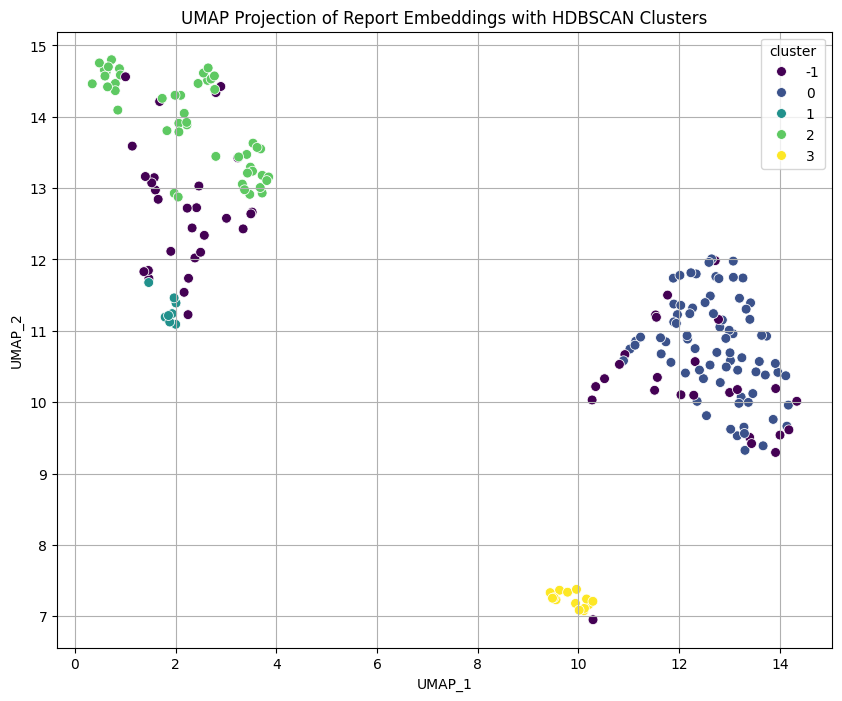

,UMAP_1,UMAP_2,cluster,link
0,12.267995,11.319844,0,https://www.erowid.org/experiences/exp.php?ID=...
1,11.967084,11.227126,0,https://www.erowid.org/experiences/exp.php?ID=...
2,13.868050,9.758631,0,https://www.erowid.org/experiences/exp.php?ID=...
3,11.023027,10.744541,0,https://www.erowid.org/experiences/exp.php?ID=...
4,12.543542,9.811134,0,https://www.erowid.org/experiences/exp.php?ID=...


In [15]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

# Load embeddings and cluster labels from the JSON file
try:
    with open('report_embeddings_with_hdbscan_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_hdbscan_clusters.json' not found. Please run the clustering step first.")
    report_data_with_clusters = []

if report_data_with_clusters:
    # Extract embeddings and cluster labels
    embeddings = np.array([item['embedding'] for item in report_data_with_clusters])
    cluster_labels = np.array([item['hdbscan_cluster_label'] for item in report_data_with_clusters])
    links = [item['link'] for item in report_data_with_clusters]

    # Apply UMAP for dimensionality reduction
    # You might need to adjust the parameters (e.g., n_neighbors, min_dist, n_components)
    # based on your data and desired visualization
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings = reducer.fit_transform(embeddings)

    # Create a DataFrame for easy plotting
    df_umap = pd.DataFrame(umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
    df_umap['cluster'] = cluster_labels
    df_umap['link'] = links

    # Plot the UMAP embeddings
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title('UMAP Projection of Report Embeddings with HDBSCAN Clusters')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap.head())
else:
    print("No data loaded for UMAP visualization.")

In [3]:
# You might need to install keybert if you haven't already
# !pip install keybert

from keybert import KeyBERT
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity

# Load cleaned reports
try:
    with open('cleaned_reports.json', 'r') as f:
        cleaned_reports = json.load(f)
except FileNotFoundError:
    print("Error: 'cleaned_reports.json' not found. Please make sure you have run the report cleaning step.")
    cleaned_reports = []

# Load embeddings and cluster labels from the JSON file
try:
    with open('report_embeddings_with_hdbscan_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_hdbscan_clusters.json' not found. Please run the clustering step first.")
    report_data_with_clusters = []

if not cleaned_reports or not report_data_with_clusters:
    print("Missing required data. Cannot perform KeyBERT analysis.")
else:
    # Create a DataFrame from the clustered data for easier manipulation
    df_clustered_reports = pd.DataFrame(report_data_with_clusters)

    # Get the list of unique cluster labels (excluding noise, typically -1)
    unique_clusters = sorted(df_clustered_reports['hdbscan_cluster_label'].unique())
    non_noise_clusters = [c for c in unique_clusters if c != -1]

    if not non_noise_clusters:
        print("No non-noise clusters found to analyze.")
    else:
        print("Analyzing themes for central reports of each cluster using KeyBERT:")

        # Initialize KeyBERT model
        # You can specify a different embedding model if needed
        kw_model = KeyBERT()

        # Create a dictionary to easily access embeddings by link
        embedding_dict = {item['link']: np.array(item['embedding']) for item in report_data_with_clusters}


        for target_cluster_label in non_noise_clusters:
            print(f"\n--- Analyzing Central Reports of Cluster {target_cluster_label} ---")

            # Get the links and embeddings for reports in the target cluster
            cluster_data = df_clustered_reports[df_clustered_reports['hdbscan_cluster_label'] == target_cluster_label]
            cluster_links = cluster_data['link'].tolist()
            cluster_embeddings = np.array([embedding_dict[link] for link in cluster_links if link in embedding_dict])

            if not cluster_links or cluster_embeddings.shape[0] == 0:
                print(f"No reports or embeddings found for cluster {target_cluster_label}.")
                continue

            # Calculate the average similarity of each report to all other reports in the cluster
            # Compute cosine similarity matrix within the cluster
            similarity_matrix = cosine_similarity(cluster_embeddings)

            # Calculate the average similarity for each report (excluding self-similarity)
            average_similarities = (similarity_matrix.sum(axis=1) - 1) / (similarity_matrix.shape[1] - 1)

            # Add average similarity to the cluster_data DataFrame
            cluster_data = cluster_data.copy() # Avoid SettingWithCopyWarning
            cluster_data['average_similarity'] = average_similarities

            # Select the top N central reports based on average similarity
            num_central_reports = min(5, len(cluster_links)) # Select up to 5 central reports
            central_reports = cluster_data.sort_values(by='average_similarity', ascending=False).head(num_central_reports)
            central_report_links = central_reports['link'].tolist()

            print(f"Selected {len(central_report_links)} central reports for Cluster {target_cluster_label}:")
            for link in central_report_links:
                print(f"- {link}")

            # Retrieve the full report text for these central reports from cleaned_reports
            report_text_dict = {report['link']: report['report_text'] for report in cleaned_reports}
            central_reports_text = [report_text_dict[link] for link in central_report_links if link in report_text_dict]

            if not central_reports_text:
                print(f"No report text found for central reports in cluster {target_cluster_label}.")
            else:
                # Concatenate the text of central reports for KeyBERT analysis
                central_document = " ".join(central_reports_text)

                # Extract keywords using KeyBERT
                keywords = kw_model.extract_keywords(
                    central_document,
                    keyphrase_ngram_range=(1, 2), # Consider unigrams and bigrams
                    stop_words='english',
                    use_maxsum=True, # Use Max Sum Similarity for diversity
                    nr_candidates=20, # Number of candidates to consider for diversity
                    top_n=10 # Number of top keywords to extract
                )

                print(f"Top KeyBERT keywords for Central Reports of Cluster {target_cluster_label}:")
                # KeyBERT returns a list of tuples: (keyword, score)
                for keyword, score in keywords:
                    print(f"- {keyword} (Score: {score:.4f})")

                print(f"\nPotential themes based on top keywords from central reports:")
                print(", ".join([keyword for keyword, score in keywords]))

Analyzing themes for central reports of each cluster using KeyBERT:

--- Analyzing Central Reports of Cluster 0 ---
Selected 5 central reports for Cluster 0:
- https://www.erowid.org/experiences/exp.php?ID=106677
- https://www.erowid.org/experiences/exp.php?ID=94429
- https://www.erowid.org/experiences/exp.php?ID=58907
- https://www.erowid.org/experiences/exp.php?ID=87447
- https://www.erowid.org/experiences/exp.php?ID=80512
Top KeyBERT keywords for Central Reports of Cluster 0:
- psychedelics doses (Score: 0.6451)
- psychedelic activation (Score: 0.6524)
- psychedelics spiritual (Score: 0.6548)
- psychedelic substances (Score: 0.6599)
- hypotheses psychedelic (Score: 0.6661)
- psychedelic experience (Score: 0.6666)
- sensitive psychedelics (Score: 0.6673)
- study psychedelics (Score: 0.7050)
- neurophysiology psychedelic (Score: 0.7180)
- dmt psychedelics (Score: 0.7524)

Potential themes based on top keywords from central reports:
psychedelics doses, psychedelic activation, psychedel

Applied K-Means clustering with 3 clusters.
K-Means cluster labels added to data and saved to 'report_embeddings_with_kmeans_clusters.json'.

Visualizing K-Means clusters using UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


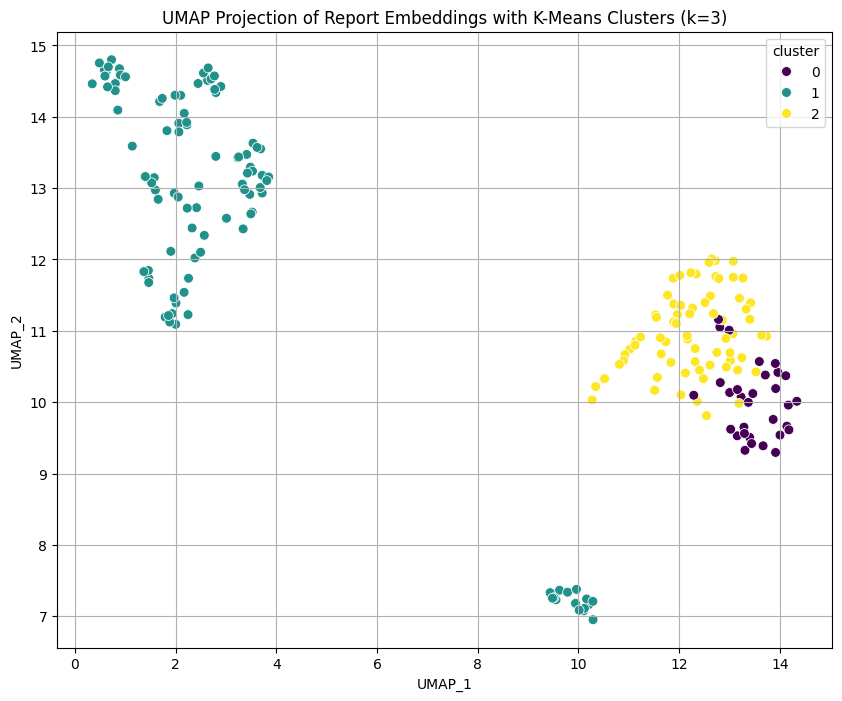

,UMAP_1,UMAP_2,cluster,link
0,12.267995,11.319844,2,https://www.erowid.org/experiences/exp.php?ID=...
1,11.967084,11.227126,2,https://www.erowid.org/experiences/exp.php?ID=...
2,13.868050,9.758631,0,https://www.erowid.org/experiences/exp.php?ID=...
3,11.023027,10.744541,2,https://www.erowid.org/experiences/exp.php?ID=...
4,12.543542,9.811134,2,https://www.erowid.org/experiences/exp.php?ID=...



Number of reports per K-Means cluster:
kmeans_cluster_label
1    100
2     69
0     31
Name: count, dtype: int64

Example reports from K-Means Cluster 0:
- https://www.erowid.org/experiences/exp.php?ID=96444
- https://www.erowid.org/experiences/exp.php?ID=34866
- https://www.erowid.org/experiences/exp.php?ID=99695

Example reports from K-Means Cluster 1:
- https://www.erowid.org/experiences/exp.php?ID=118252
- https://www.erowid.org/experiences/exp.php?ID=112397
- https://www.erowid.org/experiences/exp.php?ID=96444

Example reports from K-Means Cluster 2:
- https://www.erowid.org/experiences/exp.php?ID=118252
- https://www.erowid.org/experiences/exp.php?ID=112397
- https://www.erowid.org/experiences/exp.php?ID=64048


In [5]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import json
import umap
import matplotlib.pyplot as plt
import seaborn as sns
# kmeans clustering with  visualization
# Load embeddings from the JSON file
try:
    with open('report_embeddings.json', 'r') as f:
        report_embeddings_data = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings.json' not found. Please run the embedding step first.")
    report_embeddings_data = []

if report_embeddings_data:
    # Extract embeddings and links
    links = [item['link'] for item in report_embeddings_data]
    embeddings = np.array([item['embedding'] for item in report_embeddings_data])

    # Apply K-Means clustering
    # You need to choose the number of clusters (n_clusters)
    n_clusters = 3  # Example: Choose 3 clusters. You might need to experiment with this value.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(embeddings)

    # Get cluster labels
    cluster_labels_kmeans = kmeans.labels_

    # Add K-Means cluster labels back to the data structure
    # You can add it to the original list or create a new structure
    for i, label in enumerate(cluster_labels_kmeans):
        report_embeddings_data[i]['kmeans_cluster_label'] = int(label) # Store as int

    # Optionally, save the updated data with K-Means cluster labels to a new JSON file
    with open('report_embeddings_with_kmeans_clusters.json', 'w') as f:
        json.dump(report_embeddings_data, f, indent=4)

    print(f"Applied K-Means clustering with {n_clusters} clusters.")
    print(f"K-Means cluster labels added to data and saved to 'report_embeddings_with_kmeans_clusters.json'.")

    # You can also add the cluster labels to the df_processed_reports DataFrame if it exists
    if 'df_processed_reports' in locals():
        # Ensure the order of embeddings matches the order of rows in the DataFrame
        # This might require aligning by link if the order is not guaranteed
        if 'link' in df_processed_reports.columns:
             # Create a mapping from link to cluster label
            link_to_kmeans_cluster = {item['link']: item['kmeans_cluster_label'] for item in report_embeddings_data}
            # Add cluster labels to the DataFrame based on the 'link' column
            df_processed_reports['kmeans_cluster_label'] = df_processed_reports['link'].map(link_to_kmeans_cluster)
            print("K-Means cluster labels added to df_processed_reports DataFrame.")
        else:
            print("Warning: 'link' column not found in df_processed_reports. Could not add K-Means cluster labels to DataFrame.")

    # --- Visualization of K-Means clusters using UMAP ---

    print("\nVisualizing K-Means clusters using UMAP...")

    # Apply UMAP for dimensionality reduction
    # Use the same random_state as for HDBSCAN visualization if you want comparable layouts
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings = reducer.fit_transform(embeddings)

    # Create a DataFrame for easy plotting
    df_umap_kmeans = pd.DataFrame(umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
    df_umap_kmeans['cluster'] = cluster_labels_kmeans
    df_umap_kmeans['link'] = links

    # Plot the UMAP embeddings with K-Means cluster labels
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap_kmeans,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title(f'UMAP Projection of Report Embeddings with K-Means Clusters (k={n_clusters})')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap_kmeans.head())


else:
    print("No embeddings data loaded. Cannot perform K-Means clustering or visualization.")

# --- Add code for analyzing K-Means clusters (similar to HDBSCAN analysis) ---

# Convert the data with K-Means cluster labels to a pandas DataFrame for easier analysis
df_clustered_reports_kmeans = pd.DataFrame(report_embeddings_data)

# Display the number of reports in each K-Means cluster
print("\nNumber of reports per K-Means cluster:")
print(df_clustered_reports_kmeans['kmeans_cluster_label'].value_counts())

# Function to display example reports from a specific K-Means cluster
def display_example_reports_kmeans(cluster_label, num_examples=3):
    print(f"\nExample reports from K-Means Cluster {cluster_label}:")
    cluster_reports = df_clustered_reports_kmeans[df_clustered_reports_kmeans['kmeans_cluster_label'] == cluster_label]
    if cluster_reports.empty:
        print("No reports found in this cluster.")
        return

    # Display the links of example reports
    for i, row in cluster_reports.head(num_examples).iterrows():
        print(f"- {row['link']}")

# Example usage: Display example reports from each K-Means cluster
unique_kmeans_clusters = sorted(df_clustered_reports_kmeans['kmeans_cluster_label'].unique())
for cluster_label in unique_kmeans_clusters:
     display_example_reports_kmeans(cluster_label)

**bold text**# gemini cluster theme
Use the Gemini API to find the theme of each cluster based on the 3 most central reports from each cluster, respecting API limitations by chunking the data if necessary.

## Load data and identify central reports

### Subtask:
Load the clustered data and identify the 3 most central reports for each cluster based on embedding similarity.


**Reasoning**:
Load the clustered data, extract embeddings, and identify the 3 most central reports for each cluster based on cosine similarity.



In [6]:
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

# Load embeddings and cluster labels from the JSON file
try:
    with open('report_embeddings_with_hdbscan_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_hdbscan_clusters.json' not found. Please run the clustering step first.")
    report_data_with_clusters = []

central_reports_by_cluster = {}

if report_data_with_clusters:
    # Create a DataFrame from the clustered data
    df_clustered_reports = pd.DataFrame(report_data_with_clusters)

    # Get the list of unique cluster labels (excluding noise, typically -1)
    unique_clusters = sorted(df_clustered_reports['hdbscan_cluster_label'].unique())
    non_noise_clusters = [c for c in unique_clusters if c != -1]

    if not non_noise_clusters:
        print("No non-noise clusters found to analyze.")
    else:
        print("Identifying central reports for each cluster:")

        # Create a dictionary to easily access embeddings by link
        embedding_dict = {item['link']: np.array(item['embedding']) for item in report_data_with_clusters}

        for target_cluster_label in non_noise_clusters:
            print(f"Processing Cluster {target_cluster_label}...")

            # Get the links and embeddings for reports in the target cluster
            cluster_data = df_clustered_reports[df_clustered_reports['hdbscan_cluster_label'] == target_cluster_label].copy()
            cluster_links = cluster_data['link'].tolist()
            cluster_embeddings = np.array([embedding_dict[link] for link in cluster_links if link in embedding_dict])

            if not cluster_links or cluster_embeddings.shape[0] == 0:
                print(f"No reports or embeddings found for cluster {target_cluster_label}.")
                continue

            # Calculate the average similarity of each report to all other reports in the cluster
            # Compute cosine similarity matrix within the cluster
            similarity_matrix = cosine_similarity(cluster_embeddings)

            # Calculate the average similarity for each report (excluding self-similarity)
            # Ensure there's more than one report to calculate meaningful average similarity excluding self
            if similarity_matrix.shape[0] > 1:
                average_similarities = (similarity_matrix.sum(axis=1) - 1) / (similarity_matrix.shape[1] - 1)
            else:
                # Handle the case of a single-report cluster (no other reports to compare to)
                average_similarities = np.array([0.0]) # Assign 0 average similarity

            # Add average similarity to the cluster_data DataFrame
            cluster_data['average_similarity'] = average_similarities

            # Select the top 3 central reports based on average similarity
            num_central_reports = min(3, len(cluster_links)) # Select up to 3 central reports
            central_reports = cluster_data.sort_values(by='average_similarity', ascending=False).head(num_central_reports)

            # Store the central reports for this cluster
            central_reports_by_cluster[target_cluster_label] = central_reports.to_dict(orient='records')

            print(f"Identified {len(central_reports)} central reports for Cluster {target_cluster_label}.")

else:
    print("No data loaded for identifying central reports.")

# The central_reports_by_cluster dictionary now contains the 3 most central reports for each non-noise cluster
# You can further process or use this dictionary as needed.

Identifying central reports for each cluster:
Processing Cluster 0...
Identified 3 central reports for Cluster 0.
Processing Cluster 1...
Identified 3 central reports for Cluster 1.
Processing Cluster 2...
Identified 3 central reports for Cluster 2.
Processing Cluster 3...
Identified 3 central reports for Cluster 3.


## Retrieve report text

### Subtask:
Get the full text for the selected central reports from the cleaned reports data.


**Reasoning**:
Load the cleaned reports and create a dictionary mapping links to report text.



In [7]:
import json

# Load cleaned reports
try:
    with open('cleaned_reports.json', 'r') as f:
        cleaned_reports = json.load(f)
except FileNotFoundError:
    print("Error: 'cleaned_reports.json' not found. Please make sure you have run the report cleaning step.")
    cleaned_reports = []

# Create a dictionary mapping links to report text
report_text_dict = {report['link']: report['report_text'] for report in cleaned_reports}

# Retrieve the full text for the central reports
central_reports_with_text = {}

if central_reports_by_cluster:
    print("Retrieving full text for central reports:")
    for cluster_label, central_reports_list in central_reports_by_cluster.items():
        central_reports_with_text[cluster_label] = []
        print(f"Processing Cluster {cluster_label}...")
        for report_info in central_reports_list:
            link = report_info['link']
            if link in report_text_dict:
                report_info['report_text'] = report_text_dict[link]
                central_reports_with_text[cluster_label].append(report_info)
                print(f"Retrieved text for: {link}")
            else:
                print(f"Warning: Report text not found for link: {link}")
                # Optionally, you can still append the info without text or handle as needed
                report_info['report_text'] = "Report text not found."
                central_reports_with_text[cluster_label].append(report_info)

else:
    print("No central reports data available. Cannot retrieve text.")

# The central_reports_with_text dictionary now contains the central reports with their full text
# This data can be used in the next step for thematic analysis using Gemini.

Retrieving full text for central reports:
Processing Cluster 0...
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=106677
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=94429
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=58907
Processing Cluster 1...
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=58800
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=106818
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=81462
Processing Cluster 2...
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=106677
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=97591
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=90113
Processing Cluster 3...
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=91964
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=112771
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=

## Prepare text for api

### Subtask:
Combine the text of the central reports for each cluster and chunk it if needed to comply with Gemini API token limits.


**Reasoning**:
Combine the text of the central reports for each cluster and chunk it if needed to comply with Gemini API token limits.



In [8]:
import textwrap

prepared_text_for_api = {}
# A rough estimate of token limit for Gemini 1.5 Flash, considering prompt size and response size
# This might need adjustment based on actual usage and model capabilities
TOKEN_LIMIT = 10000  # Example token limit, adjust as needed
# Use a fraction of the token limit for each chunk to leave space for the prompt and response
CHUNK_TOKEN_FRACTION = 0.7
CHUNK_SIZE = int(TOKEN_LIMIT * CHUNK_TOKEN_FRACTION) # Character count as a proxy

print("Preparing text for API calls:")

if central_reports_with_text:
    for cluster_label, central_reports_list in central_reports_with_text.items():
        combined_text = " ".join([report['report_text'] for report in central_reports_list])

        if len(combined_text) > CHUNK_SIZE:
            # Chunking is needed
            # A simple text wrapper is used here for demonstration.
            # For more accurate token-based chunking, a proper tokenizer should be used.
            chunks = textwrap.wrap(combined_text, width=CHUNK_SIZE, replace_whitespace=False)
            prepared_text_for_api[cluster_label] = chunks
            print(f"Cluster {cluster_label}: Chunked into {len(chunks)} parts.")
        else:
            # No chunking needed
            prepared_text_for_api[cluster_label] = [combined_text]
            print(f"Cluster {cluster_label}: No chunking required.")
else:
    print("No central reports with text available for processing.")

# The prepared_text_for_api dictionary now contains the text for each cluster,
# chunked if necessary, ready to be sent to the Gemini API.

Preparing text for API calls:
Cluster 0: Chunked into 10 parts.
Cluster 1: Chunked into 5 parts.
Cluster 2: Chunked into 9 parts.
Cluster 3: Chunked into 6 parts.


## Define gemini prompt

### Subtask:
Create a clear prompt for the Gemini API to identify the theme based on the provided report text.


**Reasoning**:
Define a clear and concise prompt for the Gemini API to identify the theme based on the provided report text.



In [9]:
theme_extraction_prompt = """
Analyze the following text, which is a collection of excerpts from drug experience reports within a similar cluster.
Identify the overarching theme or main focus of these reports.
Provide a concise summary of the theme in one or two sentences.

Report text excerpts:
{report_text_chunk}

Theme:
"""

print(theme_extraction_prompt)


Analyze the following text, which is a collection of excerpts from drug experience reports within a similar cluster.
Identify the overarching theme or main focus of these reports.
Provide a concise summary of the theme in one or two sentences.

Report text excerpts:
{report_text_chunk}

Theme:



## Process with gemini api

### Subtask:
Send the prepared text (in chunks if necessary) for each cluster to the Gemini API and extract the theme from the response. Implement error handling and sleep time between API calls.


**Reasoning**:
Iterate through the prepared text for each cluster, send each chunk to the Gemini API with the theme extraction prompt, handle potential errors, store the raw response, and implement sleep time between calls.



In [10]:
import time
import google.generativeai as genai

cluster_themes_raw_response = {}
# Assuming model_name and SLEEP_TIME are defined in previous cells

print("Sending text chunks to Gemini API for theme extraction:")

if prepared_text_for_api:
    for cluster_label, text_chunks in prepared_text_for_api.items():
        print(f"Processing Cluster {cluster_label}...")
        cluster_themes_raw_response[cluster_label] = []

        for i, chunk in enumerate(text_chunks):
            print(f"Processing chunk {i+1}/{len(text_chunks)} for Cluster {cluster_label}")
            prompt = theme_extraction_prompt.format(report_text_chunk=chunk)

            try:
                # Send prompt to Gemini API
                model = genai.GenerativeModel(model_name)
                response = model.generate_content(prompt)

                # Store the raw response text
                extracted_info = {
                    'cluster_label': cluster_label,
                    'chunk_index': i,
                    'raw_response_text': response.text
                }
                cluster_themes_raw_response[cluster_label].append(extracted_info)
                print(f"Successfully processed chunk {i+1} for Cluster {cluster_label}")

            except Exception as e:
                print(f"Error processing chunk {i+1} for Cluster {cluster_label}: {e}")
                cluster_themes_raw_response[cluster_label].append({
                    'cluster_label': cluster_label,
                    'chunk_index': i,
                    'raw_response_text': f"Error: {e}"
                })

            # Implement sleep time
            time.sleep(SLEEP_TIME)
            print(f"Sleeping for {SLEEP_TIME} seconds.")

else:
    print("No prepared text available for API calls.")

# The cluster_themes_raw_response dictionary now contains the raw API responses
# for each chunk of each cluster. Further processing is needed to extract
# and consolidate the actual themes.

Sending text chunks to Gemini API for theme extraction:
Processing Cluster 0...
Processing chunk 1/10 for Cluster 0
Error processing chunk 1 for Cluster 0: name 'model_name' is not defined


NameError: name 'SLEEP_TIME' is not defined